In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import scipy.stats as stats

In [6]:
import statsmodels.api as sm

In [7]:
%matplotlib inline

In [8]:
gdp_df = pd.read_csv('data/gdp_per_capita.csv', nrows=6500)

In [9]:
gdp_df.shape

(6500, 4)

In [10]:
gdp_df.columns

Index(['Country or Area', 'Year', 'Value', 'Value Footnotes'], dtype='object')

GDP_Per_Capita dataframe has 6500 rows and 4 columns and the columns are object data type. 

In [11]:
gdp_df=gdp_df.drop(columns='Value Footnotes',axis =1)

In [12]:
gdp_df=gdp_df.rename(columns={'Value':'GDP_Per_Capita'})

In [13]:
continent_df=pd.read_csv('data/continents.csv')

In [14]:
gdp_df=gdp_df.rename(columns={'Country or Area':'Country'})

In [15]:
gdp_df["Country"]=gdp_df.replace({'Country': {"CÃƒÂ´te d'Ivoire":"Ivory Coast"}})

In [16]:
gdp_df["Country"]=gdp_df.replace({'Country':{"CuraÃ§ao":"Curaçao"}})

In [17]:
gdp_df["Country"]=gdp_df.replace({'Country':{"SÃ£o TomÃ© and Principe":"Sao Tome and Principe"}})

In [18]:
gdp_df["Country"]=gdp_df.replace({'Country':{"Sint Maarten (Dutch part)":"Sint Maarten"}})

In [19]:
gdp_df = pd.merge(gdp_df,continent_df, on='Country')

In [20]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5197 entries, 0 to 5196
Data columns (total 4 columns):
Country           5197 non-null object
Year              5197 non-null int64
GDP_Per_Capita    5197 non-null float64
Continent         5197 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 203.0+ KB


In [21]:
%%time
gdp_df.groupby('Continent').GDP_Per_Capita.mean()

CPU times: user 2.95 ms, sys: 1.68 ms, total: 4.63 ms
Wall time: 3.83 ms


Continent
Africa            4622.013203
Asia             21174.893215
Europe           26497.245133
North America    19228.818275
Oceania           8818.318792
South America    10989.950644
Name: GDP_Per_Capita, dtype: float64

In [22]:
gdp_df = gdp_df.astype({"Continent": 'category'})

In [23]:
%%time
gdp_df.groupby('Continent').GDP_Per_Capita.mean()

CPU times: user 3.58 ms, sys: 2.25 ms, total: 5.83 ms
Wall time: 5.29 ms


Continent
Africa            4622.013203
Asia             21174.893215
Europe           26497.245133
North America    19228.818275
Oceania           8818.318792
South America    10989.950644
Name: GDP_Per_Capita, dtype: float64

In [24]:
gdp_df.groupby('Continent')['Country'].count()

Continent
Africa           1372
Asia             1183
Europe           1202
North America     742
Oceania           365
South America     333
Name: Country, dtype: int64

In [25]:
y=gdp_df.groupby('Continent')['Country'].count()
x=column='Continent'

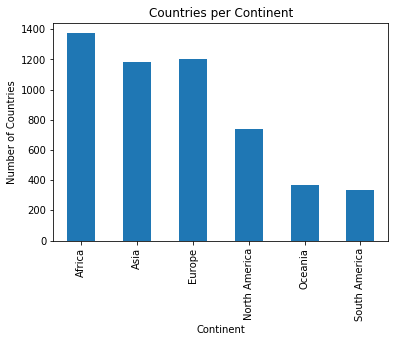

In [26]:
gdp_df.groupby('Continent')['Country'].count().plot(kind='bar',title='Countries per Continent')
plt.xlabel('Continent')
plt.ylabel('Number of Countries');

In [27]:
gdp_df.groupby('Continent')['Country'].count().sum()

5197

In [28]:
gdp_df.groupby('Year').count()

,Country,GDP_Per_Capita,Continent
Year,,,
1990,165,165,165
1991,166,166,166
1992,168,168,168
1993,170,170,170
1994,173,173,173
1995,179,179,179
1996,179,179,179
1997,181,181,181
1998,182,182,182


There are 5,197 countries in this dataset and the years range of 1990 to 2017. 

In [29]:
gdp_2014=gdp_df.loc[gdp_df['Year'] == 2014]

In [30]:
gdp_2014.describe()

,Year,GDP_Per_Capita
count,192.0,192.000000
mean,2014.0,18866.383284
std,0.0,20704.886345
min,2014.0,377.908916
25%,2014.0,4162.098972
50%,2014.0,12092.070598
75%,2014.0,26540.135519
max,2014.0,130439.187070


In [31]:
gdp_2014.sort_values(by=['GDP_Per_Capita'])

,Country,Year,GDP_Per_Capita,Continent
2922,Mauritania,2014,377.908916,Africa
896,Central African Republic,2014,676.675821,Africa
739,Burundi,2014,768.469837,Africa
1217,Dem. Rep. Congo,2014,784.872656,Africa
3341,Niger,2014,900.136918,Africa
3134,Mozambique,2014,1117.872529,Africa
2759,Malawi,2014,1142.530804,Africa
2615,Liberia,2014,1257.625441,Africa
2731,Madagascar,2014,1372.015959,Africa
1515,Ethiopia,2014,1413.962518,Africa


Macao SAR China, Qatar, Luxembourg, Singapore, and Brunei had the highest GDP per capita in 2014. Niger, Dem Rep Congo, Burundi, Central African Republic, and Mauritania had the lowest GDP per capita in 2014. 

In [32]:
gdp_2014=gdp_2014.assign(GDP_Group=pd.cut(gdp_2014['GDP_Per_Capita'], bins=[0,4162.17,26258.19,130439.19], include_lowest=True, labels=['low','med','high']))

In [33]:
gdp_2014.groupby(['Continent','GDP_Group'])['GDP_Group'].count()

Continent      GDP_Group
Africa         low          33
               med          16
               high          1
Asia           low           7
               med          24
               high         13
Europe         med          21
               high         24
North America  low           2
               med          15
               high         10
Oceania        low           7
               med           5
               high          2
South America  med          12
Name: GDP_Group, dtype: int64

Europe has the most countries with a GDP per capita above the 75th percentile; which is its majority. Asia has the most countries with GDP per capita between the 25th and 75th percentilel; which is its majority. Africa has the most countries below the 25th percentile; with is also its majority. All South American countries have a GDP per capita between the 25th and 75th percentile. 

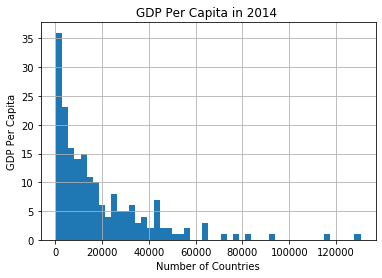

In [34]:
gdp_2014.hist(column='GDP_Per_Capita', bins=50)
plt.title('GDP Per Capita in 2014 ')
plt.xlabel('Number of Countries')
plt.ylabel('GDP Per Capita');

The histogram is skewed right which mean the data has a boundary at zero (you cannot have negative countries in this context) and the majority of countries had a lower GDP per capita. 

In [35]:
gdp_2014.skew(axis = 0)

Year              0.000000
GDP_Per_Capita    2.238514
dtype: float64

Skew of 2.24 tells that the data is highly skewed positively; which is shown in the histogram above. 

In [36]:
import seaborn as sns

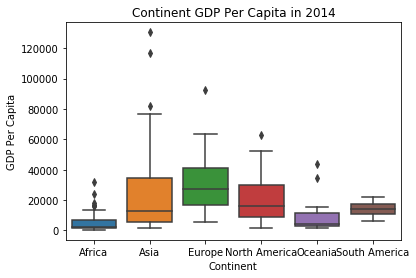

In [37]:
sns.boxplot( x=gdp_2014["Continent"], y=gdp_2014["GDP_Per_Capita"] )
plt.title('Continent GDP Per Capita in 2014')
plt.xlabel('Continent')
plt.ylabel('GDP Per Capita');

Asia, North America, and South America have very close medians but different interquartile ranges of GDP per capita in 2014. Asia has the highest GDP per capita, the largest interquartile range, and several extreme outliers. Africa has a similar minimum and median GDP per capita as Oceanian. South America does not have any outliers. 

In [38]:
gdp_df_pivot=gdp_df.pivot(index='Country',columns="Year",values="GDP_Per_Capita")

In [39]:
gdp_df_pivot=gdp_df_pivot.loc[:,[1990,2017]]

In [40]:
gdp_df_pivot=gdp_df_pivot.dropna()

In [41]:
gdp_pct_change=gdp_df_pivot.pct_change(axis='columns')

In [42]:
gdp_pct_change[2017].pct_change().fillna(0).gt(0).sum()

69

In [43]:
gdp_pct_change[2017].pct_change().fillna(0).le(0).sum()

94

In [44]:
gdp_pct_change[2017].pct_change().count()

162

In [45]:
gdp_pct_change[2017].pct_change().fillna(0).gt(0).sum()/gdp_pct_change[2017].pct_change().count()

0.42592592592592593

In [46]:
gdp_pct_change[2017].pct_change().fillna(0).le(0).sum()/gdp_pct_change[2017].pct_change().count()

0.5802469135802469

42.5% of countries or areas experienced a positive % change in GDP per capita from 1990 to 2017. 58% of countries or areas experienced a negative % change in GDP per capita from 1990 to 2017. 

In [47]:
gdp_pct_change.idxmax()

Year
1990                  NaN
2017    Equatorial Guinea
dtype: object

Equatorial Guinea had the highest % change in GDP per capita from 1990 to 2017. 

In [48]:
gdp_df_yrs_pivot=gdp_df.pivot(index='Country',columns="Year",values="GDP_Per_Capita")

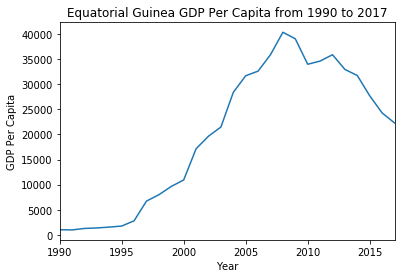

In [49]:
gdp_df_yrs_pivot.loc["Equatorial Guinea"].plot.line()
plt.title('Equatorial Guinea GDP Per Capita from 1990 to 2017')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita');

In [50]:
gdp_pct_change.sort_values(by=[2017])

Year,1990,2017
Country,,
Dem. Rep. Congo,NaN,-0.417598
United Arab Emirates,NaN,-0.406531
Burundi,NaN,-0.347110
Yemen,NaN,-0.298124
Ukraine,NaN,-0.244403
Central African Republic,NaN,-0.232873
Haiti,NaN,-0.217947
Tajikistan,NaN,-0.201474
Gabon,NaN,-0.174454


China had the 2nd highest % change in GDP from 1990 to 2017. It was less than half the % change of Equatorial Guinea. 

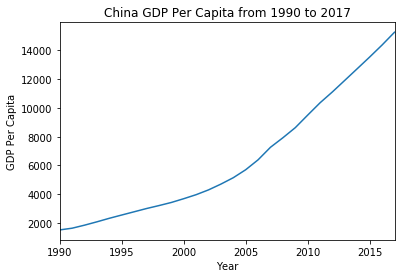

In [51]:
gdp_df_yrs_pivot.loc["China"].plot.line()
plt.title('China GDP Per Capita from 1990 to 2017')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita');

China has a more linear % change in GDP per capita relationship from 1990-2017. 

In [52]:
internet_df = pd.read_csv('data/internet_use.csv', nrows=4495)

In [53]:
internet_df.shape

(4495, 4)

In [54]:
internet_df.columns

Index(['Country or Area', 'Year', 'Value', 'Value Footnotes'], dtype='object')

Internet_df has 4495 rows, 4 columns, and columns are object data type. 

In [55]:
internet_df=internet_df.rename(columns={"Country or Area":"Country"})
internet_df=internet_df.rename(columns={"Value":"Internet_Users_Pct"})
internet_df=internet_df.drop(columns='Value Footnotes')

In [56]:
gdp_df=gdp_df.astype({'Year': 'object'})

In [57]:
internet_df=internet_df.replace({'Country':{"Macao, China":"Macao SAR, China"}})

In [58]:
internet_df=internet_df.replace({'Country':{"Brunei Darussalam":"Brunei"}})

In [59]:
gdp_and_internet_use=pd.merge(gdp_df, internet_df, on=['Country','Year'], how='inner')

In [60]:
gdp_and_internet_use_2014=gdp_and_internet_use.loc[gdp_and_internet_use['Year'] == 2014]

In [61]:
gdp_and_internet_use_2014.mean()

GDP_Per_Capita        19342.761364
Internet_Users_Pct       44.846826
dtype: float64

In [62]:
gdp_and_internet_use_2014['Internet_Users_Pct'].gt(.90).sum()

167

The mean internet users percentage in 2014 was 44.85%. 167 countries had at least 90% internet users in 2014. 

In [63]:
top_five=gdp_2014.sort_values(by=['GDP_Per_Capita'], ascending=False).head()

In [64]:
top_five

,Country,Year,GDP_Per_Capita,Continent,GDP_Group
2703,"Macao SAR, China",2014,130439.187070,Asia,high
3751,Qatar,2014,116693.507701,Asia,high
2675,Luxembourg,2014,92349.186486,Europe,high
4054,Singapore,2014,81965.361071,Asia,high
655,Brunei,2014,76448.593329,Asia,high


In [65]:
top_5_countries=top_five['Country'].values

In [66]:
top_five=gdp_and_internet_use[gdp_and_internet_use.Country.isin(top_5_countries)]

In [67]:
top_five.Country.unique()

array(['Brunei', 'Luxembourg', 'Macao SAR, China', 'Qatar', 'Singapore'],
      dtype=object)

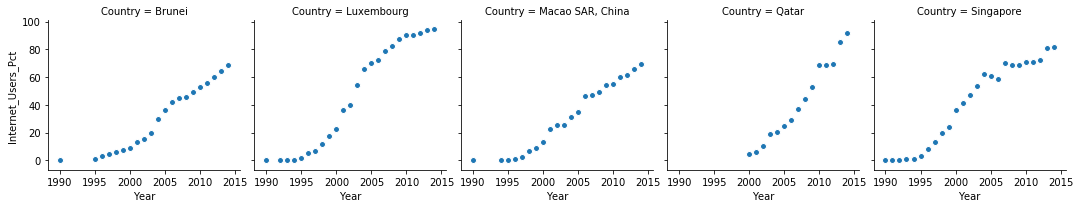

In [68]:
g=sns.FacetGrid(top_five,  col="Country")
g=g.map(plt.scatter, "Year","Internet_Users_Pct",edgecolor="w")

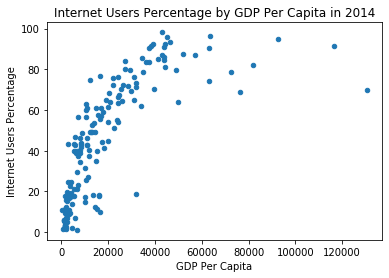

In [69]:
ax=gdp_and_internet_use_2014.plot(kind='scatter',x='GDP_Per_Capita', y='Internet_Users_Pct')
plt.title('Internet Users Percentage by GDP Per Capita in 2014')
plt.xlabel('GDP Per Capita')
plt.ylabel('Internet Users Percentage');

In [70]:
gdp_and_internet_use_2014[['GDP_Per_Capita','Internet_Users_Pct']].corr()

,GDP_Per_Capita,Internet_Users_Pct
GDP_Per_Capita,1.000000,0.739403
Internet_Users_Pct,0.739403,1.000000


.739 is the correlation coefficent, meaning that for every increase in GDP Per Capita by 1 internet use percentage increases by 73.9%. This is a strong, positive, linear relationship. 

In [71]:
X = gdp_and_internet_use_2014['GDP_Per_Capita']
X = sm.add_constant(X)
y = gdp_and_internet_use_2014['Internet_Users_Pct']
model = sm.OLS(y, X)
ols_res = model.fit()
print(ols_res.summary())

                            OLS Regression Results                            
Dep. Variable:     Internet_Users_Pct   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     199.0
Date:                Wed, 18 Sep 2019   Prob (F-statistic):           3.73e-30
Time:                        23:15:04   Log-Likelihood:                -734.27
No. Observations:                 167   AIC:                             1473.
Df Residuals:                     165   BIC:                             1479.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             25.2596      2.066     12.

/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


R-squared equals .547 (54.7%), meaning the relationship between GDP per capita and internet users percentage accounts for 54.7% of the variation. GDP per capita would not be considered a good predictor of internet users percentage. 

In [72]:
gdp_and_internet_use_2014['log_GDP_Per_Capita']=gdp_and_internet_use_2014['GDP_Per_Capita'].apply(np.log)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [73]:
gdp_and_internet_use_2014.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct,log_GDP_Per_Capita
0,Afghanistan,2014,1795.735834,Asia,6.39,7.493170
13,Albania,2014,10700.522802,Europe,60.10,9.278048
34,Algeria,2014,13549.025150,Africa,18.09,9.514070
56,Angola,2014,6813.052106,Africa,21.26,8.826595
76,Antigua and Barbuda,2014,20820.551057,North America,64.00,9.943696


In [74]:
gdp_and_internet_use_2014[['log_GDP_Per_Capita','Internet_Users_Pct']].corr()

,log_GDP_Per_Capita,Internet_Users_Pct
log_GDP_Per_Capita,1.000000,0.874564
Internet_Users_Pct,0.874564,1.000000


The correlation coefficent is .87 or 87% which can be considered a strong correlation indicating that the log model of GDP per capita is a better predictor of internet users percentage. 

In [75]:
X = gdp_and_internet_use_2014['log_GDP_Per_Capita']
X = sm.add_constant(X)
y = gdp_and_internet_use_2014['Internet_Users_Pct']
model = sm.OLS(y, X)
ols_res = model.fit()
print(ols_res.summary())

                            OLS Regression Results                            
Dep. Variable:     Internet_Users_Pct   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     536.7
Date:                Wed, 18 Sep 2019   Prob (F-statistic):           9.64e-54
Time:                        23:15:04   Log-Likelihood:                -679.47
No. Observations:                 167   AIC:                             1363.
Df Residuals:                     165   BIC:                             1369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -152.2652      8

In [76]:
gdp_and_internet_use_US=gdp_and_internet_use.loc[gdp_and_internet_use['Country']=='United States']

In [77]:
gdp_and_internet_use_US.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
3400,United States,2014,52080.792568,North America,87.360000
3401,United States,2013,51208.892428,North America,84.200000
3402,United States,2012,50632.443448,North America,79.300000
3403,United States,2011,49883.113984,North America,69.729461
3404,United States,2010,49479.248679,North America,71.690000


In [78]:
gdp_and_internet_use_US[['GDP_Per_Capita','Internet_Users_Pct']].corr()

,GDP_Per_Capita,Internet_Users_Pct
GDP_Per_Capita,1.000000,0.991618
Internet_Users_Pct,0.991618,1.000000


The correlation coefficent is .99 which is very strong correlation. I am unsure if this is useful for the entire global population due to other factors not included in this dataset. 

In [79]:
cellphone = pd.read_csv('data/cell_subscriptions.csv')

In [80]:
cellphone.head()

,Country or Area,Year(s),Value,Value Footnotes
0,Afghanistan,2012,60,NaN
1,Afghanistan,2011,54,NaN
2,Afghanistan,2010,41,NaN
3,Albania,2012,111,NaN
4,Albania,2011,96,NaN


In [84]:
cellphone = cellphone.rename(columns={"Year(s)":"Year"})
cellphone = cellphone.rename(columns={"Country or Area":"Country"})
cellphone = cellphone.rename(columns={"Value":"Cell_Subscriptions"})
cellphone = cellphone.drop(columns="Value Footnotes")

KeyError: "['Value Footnotes'] not found in axis"

In [85]:
cellphone.head()

,Country,Year,Cell_Subscriptions
0,Afghanistan,2012,60
1,Afghanistan,2011,54
2,Afghanistan,2010,41
3,Albania,2012,111
4,Albania,2011,96


In [86]:
gdp_internet_cell = pd.merge(gdp_and_internet_use, cellphone, on=['Country','Year'], how='inner')

In [88]:
gdp_internet_cell.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct,Cell_Subscriptions
0,Afghanistan,2012,1772.764974,Asia,5.454545,60
1,Afghanistan,2011,1626.764793,Asia,5.000000,54
2,Afghanistan,2010,1671.581238,Asia,4.000000,41
3,Albania,2012,10369.562385,Europe,54.655959,111
4,Albania,2011,10207.753519,Europe,49.000000,96


In [89]:
gdp_internet_cell[['GDP_Per_Capita','Cell_Subscriptions']].corr()

,GDP_Per_Capita,Cell_Subscriptions
GDP_Per_Capita,1.000000,0.557351
Cell_Subscriptions,0.557351,1.000000


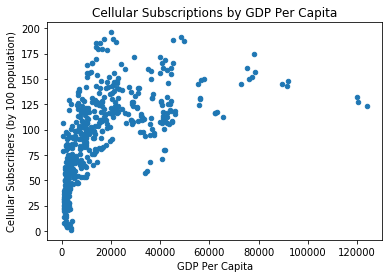

In [97]:
ax=gdp_internet_cell.plot(kind='scatter',x='GDP_Per_Capita', y='Cell_Subscriptions')
plt.title('Cellular Subscriptions by GDP Per Capita')
plt.xlabel('GDP Per Capita')
plt.ylabel('Cellular Subscribers (by 100 population)');

In [100]:
X = gdp_internet_cell['GDP_Per_Capita']
X = sm.add_constant(X)
y = gdp_internet_cell['Cell_Subscriptions']
model = sm.OLS(y, X)
ols_res = model.fit()
print(ols_res.summary())

                            OLS Regression Results                            
Dep. Variable:     Cell_Subscriptions   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     205.9
Date:                Wed, 18 Sep 2019   Prob (F-statistic):           8.10e-39
Time:                        23:25:39   Log-Likelihood:                -2280.8
No. Observations:                 459   AIC:                             4566.
Df Residuals:                     457   BIC:                             4574.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             74.8471      2.197     34.

In [91]:
gdp_internet_cell[['Internet_Users_Pct','Cell_Subscriptions']].corr()

,Internet_Users_Pct,Cell_Subscriptions
Internet_Users_Pct,1.000000,0.645336
Cell_Subscriptions,0.645336,1.000000


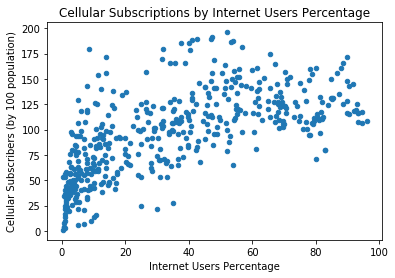

In [99]:
ax=gdp_internet_cell.plot(kind='scatter',x='Internet_Users_Pct', y='Cell_Subscriptions')
plt.title('Cellular Subscriptions by Internet Users Percentage')
plt.xlabel('Internet Users Percentage')
plt.ylabel('Cellular Subscribers (by 100 population)');

In [101]:
X = gdp_internet_cell['Internet_Users_Pct']
X = sm.add_constant(X)
y = gdp_internet_cell['Cell_Subscriptions']
model = sm.OLS(y, X)
ols_res = model.fit()
print(ols_res.summary())

                            OLS Regression Results                            
Dep. Variable:     Cell_Subscriptions   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     326.1
Date:                Wed, 18 Sep 2019   Prob (F-statistic):           2.03e-55
Time:                        23:26:10   Log-Likelihood:                -2242.5
No. Observations:                 459   AIC:                             4489.
Df Residuals:                     457   BIC:                             4497.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 61.5927      2